# day 24

In [137]:
import pandas as pd
from datetime import datetime

In [138]:
df = pd.read_excel("Asset_sales_data.xlsx")
df

,date,products,sales
0,11-20-2021,cars,19234
1,12-12-2021,boats,87598
2,11-07-2021,cars,15900
3,12-06-2021,boats,12087
4,12-09-2021,cars,56897
5,12-06-2021,houses,19345
6,11-20-2021,cars,19234
7,12-12-2021,boats,87598
8,12-06-2021,houses,20989
9,11-07-2021,cars,15900


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      19 non-null     object
 1   products  19 non-null     object
 2   sales     19 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 588.0+ bytes


In [140]:
df.head()

,date,products,sales
0,11-20-2021,cars,19234
1,12-12-2021,boats,87598
2,11-07-2021,cars,15900
3,12-06-2021,boats,12087
4,12-09-2021,cars,56897


In [141]:
c = df.columns

In [142]:
[ df[x].astype for x in c ] 

[<bound method NDFrame.astype of 0     11-20-2021
 1     12-12-2021
 2     11-07-2021
 3     12-06-2021
 4     12-09-2021
 5     12-06-2021
 6     11-20-2021
 7     12-12-2021
 8     12-06-2021
 9     11-07-2021
 10    12-06-2021
 11    12-29-2021
 12    11-25-2021
 13    12-13-2021
 14    12-06-2021
 15    12-15-2021
 16    11-20-2021
 17    12-12-2021
 18    12-12-2022
 Name: date, dtype: object>,
 <bound method NDFrame.astype of 0       cars
 1      boats
 2       cars
 3      boats
 4       cars
 5     houses
 6       cars
 7      boats
 8     houses
 9       cars
 10     boats
 11      cars
 12      cars
 13    houses
 14     boats
 15      cars
 16      cars
 17     boats
 18    houses
 Name: products, dtype: object>,
 <bound method NDFrame.astype of 0     19234
 1     87598
 2     15900
 3     12087
 4     56897
 5     19345
 6     19234
 7     87598
 8     20989
 9     15900
 10    12087
 11    66897
 12    22234
 13    22789
 14    14987
 15    54897
 16    19234
 17    87598


In [143]:
df[["date"]].astype

<bound method NDFrame.astype of           date
0   11-20-2021
1   12-12-2021
2   11-07-2021
3   12-06-2021
4   12-09-2021
5   12-06-2021
6   11-20-2021
7   12-12-2021
8   12-06-2021
9   11-07-2021
10  12-06-2021
11  12-29-2021
12  11-25-2021
13  12-13-2021
14  12-06-2021
15  12-15-2021
16  11-20-2021
17  12-12-2021
18  12-12-2022>

In [144]:
df2 = df.copy()

In [145]:
k = df2.groupby("date")["sales"].sum().idxmax()

In [167]:
h = datetime.strptime(k, '%m-%d-%Y')

In [168]:
month_name = h.strftime('%B')

In [169]:
month_name

'December'

In [173]:
n = df2.groupby("date")["sales"].sum()
n.max()

262794

In [171]:
l = n["11-20-2021": "12-06-2021 "].sum()

In [172]:
l

159431

In [174]:
df

,date,products,sales
0,11-20-2021,cars,19234
1,12-12-2021,boats,87598
2,11-07-2021,cars,15900
3,12-06-2021,boats,12087
4,12-09-2021,cars,56897
5,12-06-2021,houses,19345
6,11-20-2021,cars,19234
7,12-12-2021,boats,87598
8,12-06-2021,houses,20989
9,11-07-2021,cars,15900


In [193]:
df4.index

Index(['boats', 'cars', 'houses'], dtype='object', name='products')

In [208]:
import matplotlib.pyplot as plt

In [271]:
df4 = df.groupby(["products"])["sales"].sum()
df4.index

Index(['boats', 'cars', 'houses'], dtype='object', name='products')

In [228]:
explode = (0, 0.1, 0)

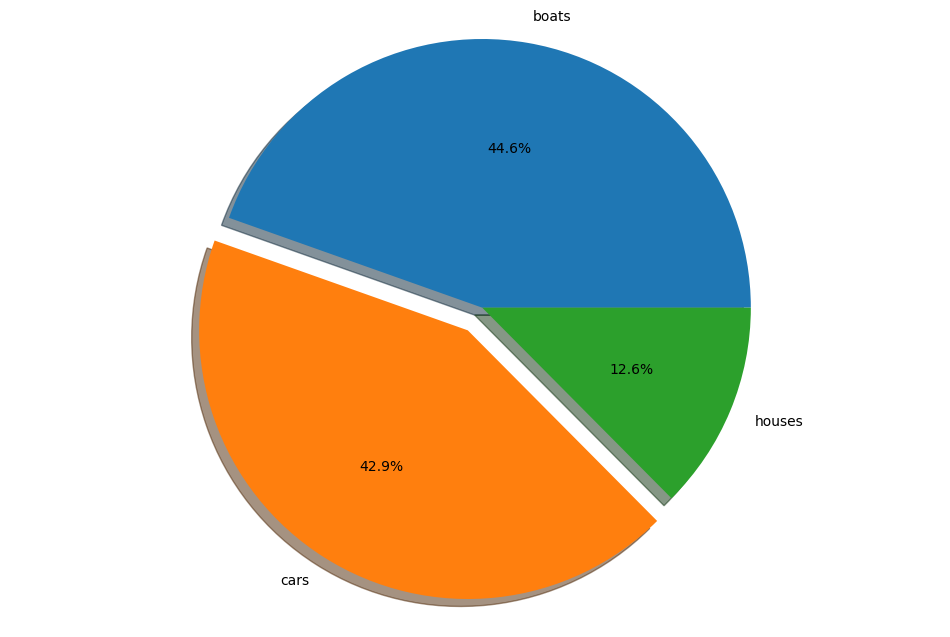

In [229]:
plt.figure( figsize=(12,8))
plt.pie(df4,
        explode = explode,
        labels = df4.index,
        autopct = '%1.1f%%',#add percentage 
        shadow = True)
plt.axis('equal')
plt.show()

In [ ]:
#pviot table

In [233]:
sales_pro = df.pivot_table(values = 'sales',
                           index = 'products',
                            aggfunc = 'sum')

In [269]:
c = sales_pro.values.reshape(1,3)
k=c[0]

In [235]:
plt.figure(figsize = (12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

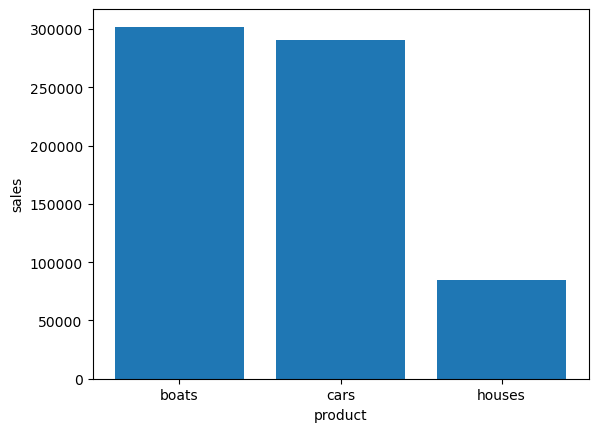

In [272]:
plt.bar(sales_pro.index, k)
plt.xlabel("product")
plt.ylabel("sales")
plt.show()